# **Twitter Sentiment Analysis**

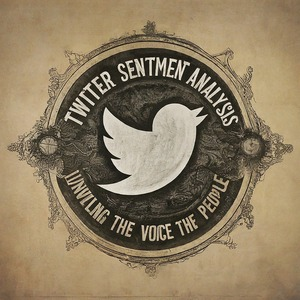

## **Author: Harshit Gahlaut**

- [LinkedIn](www.linkedin.com/in/harshitt-gahlaut)
- [GitHub](https://github.com/harshitgahlaut)
- [Kaggle](https://www.kaggle.com/harshitgahlaut)

## **Objective**:

Implement a **Natural Language Processing (NLP)** approach using **Logistic Regression** to perform **Sentiment Analysis** on the Twitter dataset. This classification problem aims to determine whether each tweet expresses a **Negative (-1), Neutral (0), or Positive (1) sentiment.**

**1) Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

**2) Importing Dataset**

In [2]:
# Loading the data into dataframe
df = pd.read_csv('Twitter_Data.csv', encoding = "ISO-8859-1")

**3) Analysing the Data**

In [3]:
# Looking at data
df.sample(5)

,clean_text,category
214585,raghuram rajan questions modis minimum govt an...,0.0
242827,bhai consider all these were not mesh than won...,0.0
153589,proving that india entering this super space p...,1.0
378387,nirav modi sought bail care for pet dog,0.0
127558,the people sikkim support modi,0.0


In [4]:
# Number of rows and columns
df.shape

(472554, 2)

In [5]:
# Deatiled information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472554 entries, 0 to 472553
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  472544 non-null  object 
 1   category    472517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.2+ MB


In [6]:
# Checking the missing values
df.isnull().sum()

clean_text    10
category      37
dtype: int64

In [7]:
# Dropping the values from dataframe
df = df.dropna()

In [8]:
# Checking the distribution of category
df['category'].value_counts()

category
 1.0    209945
 0.0    159889
-1.0    102673
Name: count, dtype: int64

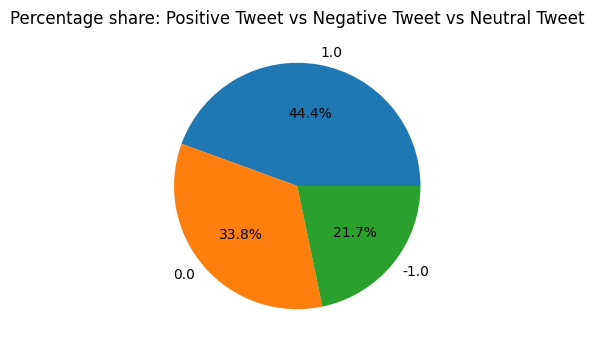

In [9]:
# Checking the categories distribution in percentage
plt.figure(figsize=[4, 4])
plt.pie(df['category'].value_counts(), labels=df['category'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage share: Positive Tweet vs Negative Tweet vs Neutral Tweet')
plt.show()

**4) Data Preprocessing**

In [10]:
import nltk
nltk.download('stopwords', quiet=True)

True

In [11]:
pattern =re.compile('[^a-zA-Z]')

english_stopwords = stopwords.words('english')

port_stemmer = PorterStemmer()

In [12]:
def preprocessed_text(text):

  stemmed_content = re.sub(pattern,' ',text)
  stemmed_content = stemmed_content.lower()

  stemmed_content = stemmed_content.split()

  stemmed_content = [port_stemmer.stem(word) for word in stemmed_content if not word in english_stopwords]
  stemmed_content = ' '.join(stemmed_content)


  return stemmed_content

In [13]:
# Applying the function
df['stemmed_content'] = df['clean_text'].apply(preprocessed_text)

In [14]:
df.head()

,clean_text,category,stemmed_content
0,when modi promised âminimum government maxim...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


**5) Data Visualization**

In [15]:
# Segrating based on different sentiments
df_negative = df[df["category"]==-1]
df_positive = df[df["category"]==1]
df_neutral = df[df["category"]==0]

In [16]:
from wordcloud import WordCloud,STOPWORDS

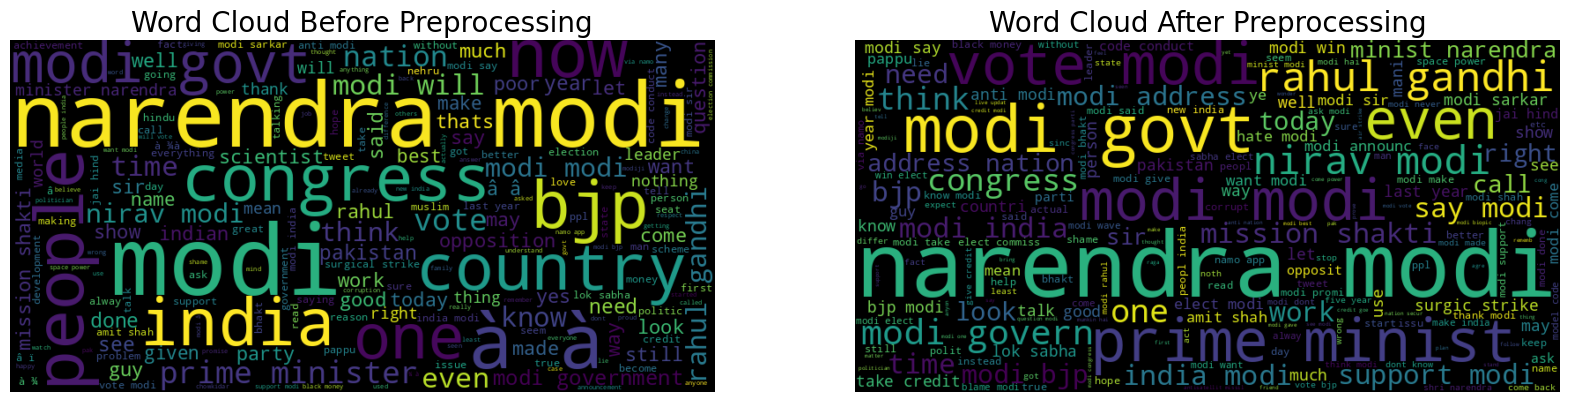

In [17]:
# Visualize the overall frequent words
all_words_raw = " ".join([sentence for sentence in df['clean_text']])
all_words_processed = " ".join([sentence for sentence in df['stemmed_content']])

wordcloud_raw = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words_raw)
wordcloud_processed = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words_processed)

# Plot the word clouds in a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the raw text word cloud
axes[0].imshow(wordcloud_raw, interpolation='bilinear')
axes[0].set_title('Word Cloud Before Preprocessing', fontsize=20)
axes[0].axis('off')

# Plot the processed text word cloud
axes[1].imshow(wordcloud_processed, interpolation='bilinear')
axes[1].set_title('Word Cloud After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

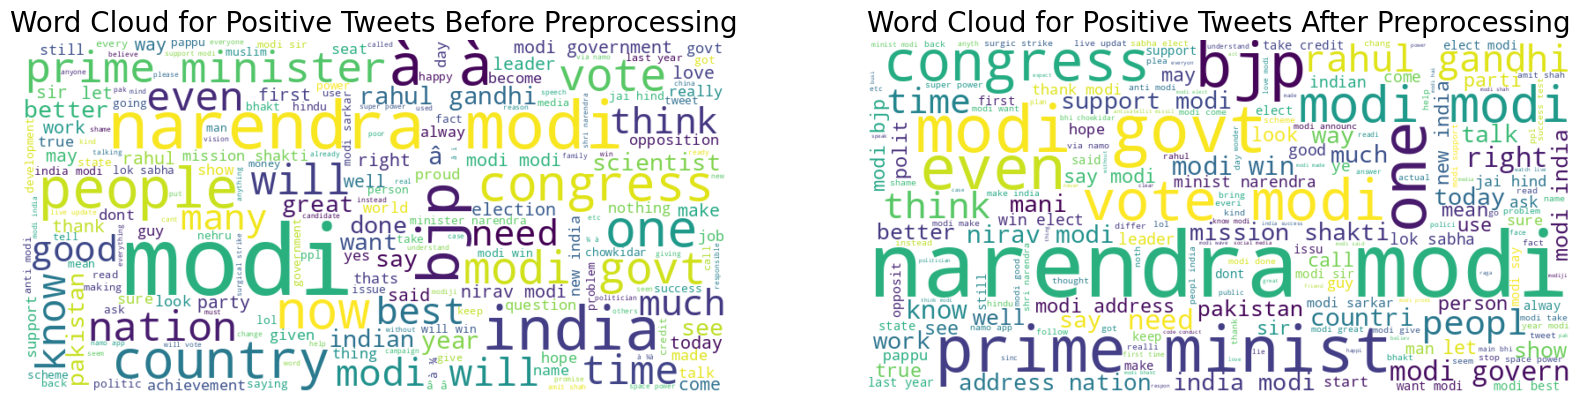

In [18]:
# Visualize the frequent words for positive tweets
all_words_raw_positive = " ".join([sentence for sentence in df_positive['clean_text']])
all_words_processed_positive = " ".join([sentence for sentence in df_positive['stemmed_content']])

wordcloud_raw_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words_raw_positive)
wordcloud_processed_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words_processed_positive)

# Plot the word clouds in a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the raw text word cloud
axes[0].imshow(wordcloud_raw_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud for Positive Tweets Before Preprocessing', fontsize=20)
axes[0].axis('off')

# Plot the processed text word cloud
axes[1].imshow(wordcloud_processed_positive, interpolation='bilinear')
axes[1].set_title('Word Cloud for Positive Tweets After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

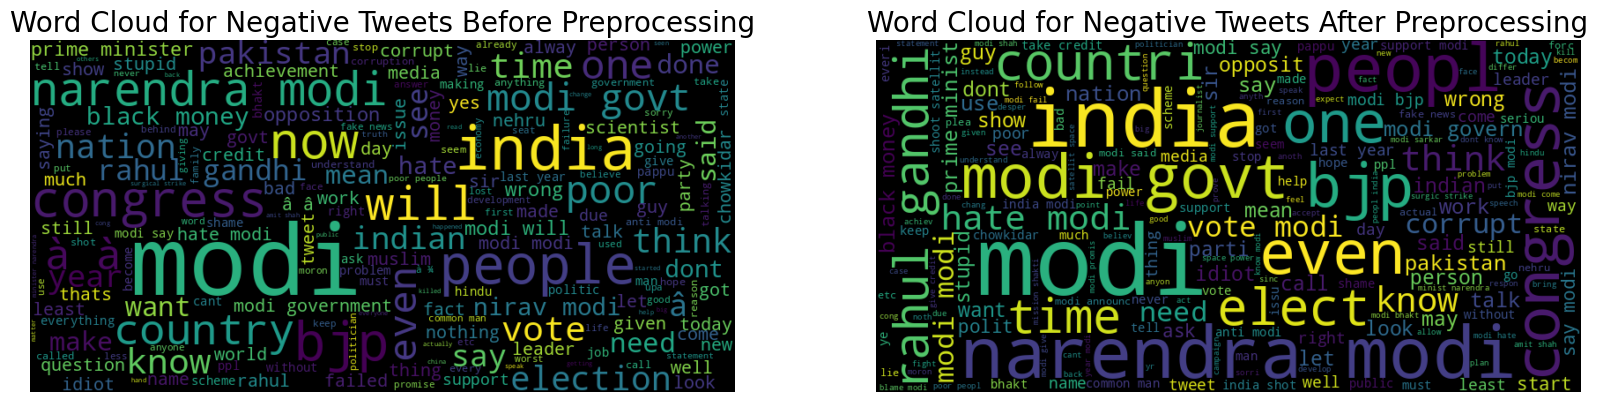

In [19]:
# Visualize the frequent words for negative tweets
all_words_raw_negative = " ".join([sentence for sentence in df_negative['clean_text']])
all_words_processed_negative = " ".join([sentence for sentence in df_negative['stemmed_content']])

wordcloud_raw_negative = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words_raw_negative)
wordcloud_processed_negative = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words_processed_negative)

# Plot the word clouds in a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the raw text word cloud
axes[0].imshow(wordcloud_raw_negative, interpolation='bilinear')
axes[0].set_title('Word Cloud for Negative Tweets Before Preprocessing', fontsize=20)
axes[0].axis('off')

# Plot the processed text word cloud
axes[1].imshow(wordcloud_processed_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud for Negative Tweets After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

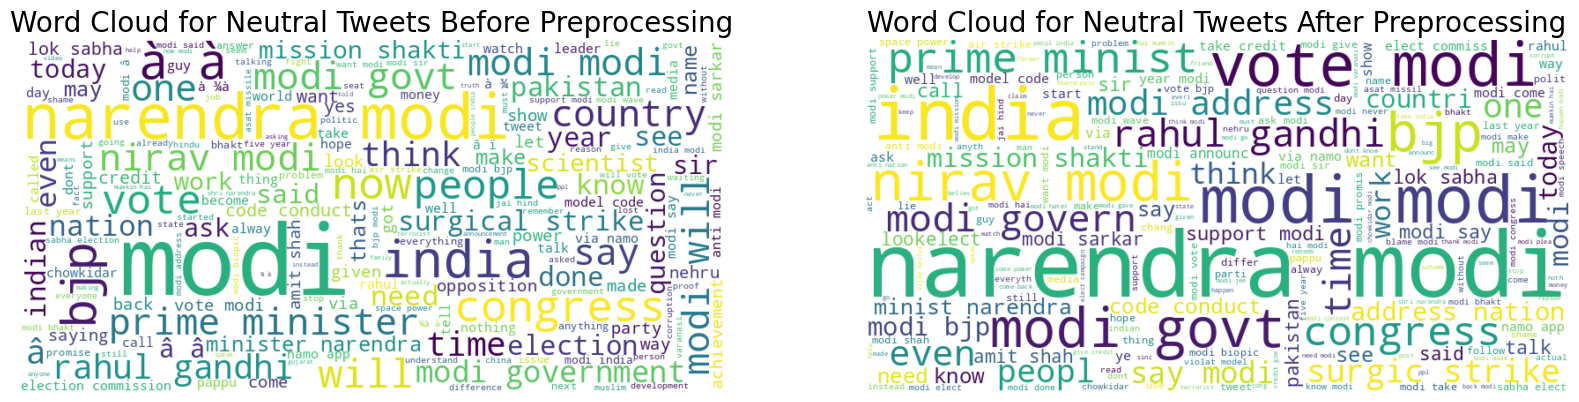

In [20]:
# Visualize the frequent words for neutral tweets
all_words_raw_neutral = " ".join([sentence for sentence in df_neutral['clean_text']])
all_words_processed_neutral = " ".join([sentence for sentence in df_neutral['stemmed_content']])

wordcloud_raw_neutral = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words_raw_neutral)
wordcloud_processed_neutral = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words_processed_neutral)

# Plot the word clouds in a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the raw text word cloud
axes[0].imshow(wordcloud_raw_neutral, interpolation='bilinear')
axes[0].set_title('Word Cloud for Neutral Tweets Before Preprocessing', fontsize=20)
axes[0].axis('off')

# Plot the processed text word cloud
axes[1].imshow(wordcloud_processed_neutral, interpolation='bilinear')
axes[1].set_title('Word Cloud for Neutral Tweets After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

**6) Splitting Input Matrix Feature and Target Feature**

In [21]:
# Separating the data and label
X = df['stemmed_content']
y = df['category']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

**7) Feature Extraction**

In [23]:
# Converting textual data into numerical
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**8) Model Training**

In [24]:
# Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Fit
lr.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr.predict(X_test_tfidf)

**9) Model Evaluation Metrics**

In [25]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [26]:
# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.87      0.80      0.83     20535
         0.0       0.86      0.93      0.90     31978
         1.0       0.91      0.89      0.90     41989

    accuracy                           0.88     94502
   macro avg       0.88      0.87      0.88     94502
weighted avg       0.88      0.88      0.88     94502



In [27]:
# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[16369  1937  2229]
 [  773 29867  1338]
 [ 1748  2948 37293]]


**10) Saving the model**

In [28]:
import pickle
filename = 'tweet_lr_model.pkl'
pickle.dump(lr, open(filename, 'wb'))